Upper Confidence Bound Implemention

Importing the LIblaries

In [24]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math

Importing the Dataset

In [25]:
dataset=pd.read_csv(r"..\Datasets\Ads_CTR_Optimisation.csv")

Implementing UCB

In [26]:
N=10000
d=10
ads_selected=[]
numbers_selection=[0]*d
sums_of_reward=[0]*d
total_reward=0

for n in range(0,N):
    ad=0
    max_upper_bound=0
    for i in range(0,d):
        if (numbers_selection[i]>0):
            average_reward=sums_of_reward[i]/numbers_selection[i]
            delta_i=math.sqrt(3/2*math.log(n+1)/numbers_selection[i])
            upper_bound =average_reward+delta_i
        else:
            upper_bound=1e400
        if upper_bound>max_upper_bound:
            max_upper_bound=upper_bound
            ad=i
    ads_selected.append(ad)
    numbers_selection[ad]+=1
    sums_of_reward[ad]+=dataset.values[n,ad]
    total_reward+=dataset.values[n,ad]

Visualising the Results

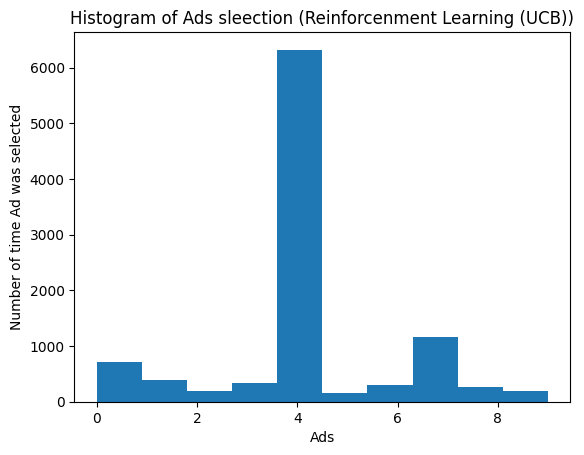

In [27]:
plt.hist(ads_selected)
plt.title("Histogram of Ads sleection (Reinforcenment Learning (UCB))")
plt.xlabel("Ads")
plt.ylabel("Number of time Ad was selected")
plt.show()